**Inital imports**

In [41]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import os
load_dotenv()

True

**Load Database**

In [42]:
user = os.getenv("user")
password = os.getenv("password")
host = os.getenv("host")
port = os.getenv("port")
dbname = os.getenv("dbname")

DATABASE_URL = f"postgresql://{user}:{password}@{host}:{port}/{dbname}"
engine = create_engine(DATABASE_URL)

try:
    with engine.connect() as conn:
        result = result = conn.execute(text("SELECT version();"))
        for row in result:
            print("Connected to:", row[0])
except Exception as e:
    print(" Connection failed:", e)

Connected to: PostgreSQL 17.4 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 13.2.0, 64-bit


**Query Dataset**

In [43]:
query = """
        SELECT * FROM simplesleepdata ORDER BY date
    """
df = pd.read_sql(query, engine)

print(df)

           date           startTime             endTime  sleepDuration  \
0    2024-06-19 2024-06-19 00:18:00 2024-06-19 09:38:00        33240.0   
1    2024-06-20 2024-06-20 00:56:00 2024-06-20 07:45:00        24540.0   
2    2024-06-21 2024-06-21 00:30:00 2024-06-21 12:16:00        41580.0   
3    2024-06-22 2024-06-22 00:23:00 2024-06-22 05:06:00        16980.0   
4    2024-06-23 2024-06-22 23:53:00 2024-06-23 07:38:00        27720.0   
..          ...                 ...                 ...            ...   
368  2025-06-22 2025-06-22 01:08:00 2025-06-22 11:40:00        37740.0   
369  2025-06-23 2025-06-23 02:32:00 2025-06-23 10:44:00        29520.0   
370  2025-06-24 2025-06-24 01:47:00 2025-06-24 08:29:00        23520.0   
371  2025-06-25 2025-06-25 02:04:00 2025-06-25 08:02:35        21335.0   
372  2025-06-26 2025-06-26 02:05:00 2025-06-26 09:30:00        25560.0   

     deepSleepDuration  lightSleepDuration  remSleepDuration  spo2Avg  \
0               4440.0             176

In [44]:
df.head()

,date,startTime,endTime,sleepDuration,deepSleepDuration,lightSleepDuration,remSleepDuration,spo2Avg,spo2Low,spo2High,respirationAvg,respirationLow,respirationHigh,awakeCounter,avgOvernightHrv,restingHeartRate,restlessmoment
0,2024-06-19,2024-06-19 00:18:00,2024-06-19 09:38:00,33240.0,4440.0,17640.0,11160.0,NaN,NaN,NaN,14.0,11.0,21.0,0.0,NaN,45.0,NaN
1,2024-06-20,2024-06-20 00:56:00,2024-06-20 07:45:00,24540.0,3960.0,15360.0,5220.0,95.0,90.0,98.0,16.0,12.0,22.0,0.0,NaN,45.0,NaN
2,2024-06-21,2024-06-21 00:30:00,2024-06-21 12:16:00,41580.0,5400.0,26160.0,10020.0,96.0,91.0,100.0,15.0,12.0,21.0,1.0,NaN,45.0,NaN
3,2024-06-22,2024-06-22 00:23:00,2024-06-22 05:06:00,16980.0,5760.0,9720.0,1500.0,95.0,87.0,99.0,16.0,12.0,21.0,0.0,NaN,47.0,NaN
4,2024-06-23,2024-06-22 23:53:00,2024-06-23 07:38:00,27720.0,5460.0,18900.0,3360.0,93.0,84.0,97.0,14.0,12.0,18.0,0.0,NaN,46.0,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                373 non-null    object        
 1   startTime           368 non-null    datetime64[ns]
 2   endTime             368 non-null    datetime64[ns]
 3   sleepDuration       368 non-null    float64       
 4   deepSleepDuration   368 non-null    float64       
 5   lightSleepDuration  368 non-null    float64       
 6   remSleepDuration    368 non-null    float64       
 7   spo2Avg             277 non-null    float64       
 8   spo2Low             277 non-null    float64       
 9   spo2High            277 non-null    float64       
 10  respirationAvg      368 non-null    float64       
 11  respirationLow      368 non-null    float64       
 12  respirationHigh     368 non-null    float64       
 13  awakeCounter        368 non-null    float64       

In [46]:
print(df.shape)

(373, 17)


In [47]:
df.describe()

,startTime,endTime,sleepDuration,deepSleepDuration,lightSleepDuration,remSleepDuration,spo2Avg,spo2Low,spo2High,respirationAvg,respirationLow,respirationHigh,awakeCounter,avgOvernightHrv,restingHeartRate,restlessmoment
count,368,368,368.000000,368.000000,368.000000,368.000000,277.000000,277.000000,277.000000,368.000000,368.000000,368.000000,368.000000,144.000000,368.000000,144.000000
mean,2024-12-22 06:37:40.108695552,2024-12-22 14:26:36.146739200,27459.896739,5465.543478,17270.869565,4724.836957,94.848375,88.523466,99.252708,14.315217,11.470109,18.804348,0.554348,81.354167,48.048913,36.076389
min,2024-06-19 00:18:00,2024-06-19 09:38:00,11520.000000,0.000000,4560.000000,0.000000,91.000000,81.000000,96.000000,13.000000,4.000000,15.000000,0.000000,23.000000,38.000000,5.000000
25%,2024-09-20 18:48:30,2024-09-21 01:44:00,23445.000000,4680.000000,14295.000000,2640.000000,94.000000,87.000000,99.000000,14.000000,11.000000,17.000000,0.000000,72.000000,46.000000,26.000000
50%,2024-12-22 12:41:30,2024-12-22 22:57:30,28017.000000,5520.000000,17370.000000,4380.000000,95.000000,89.000000,100.000000,14.000000,12.000000,19.000000,0.000000,82.000000,48.000000,37.000000
75%,2025-03-24 06:21:15,2025-03-24 15:53:30,31575.000000,6300.000000,20520.000000,6675.000000,95.000000,90.000000,100.000000,15.000000,12.000000,20.000000,1.000000,90.000000,50.000000,45.000000
max,2025-06-26 02:05:00,2025-06-26 09:30:00,42660.000000,9240.000000,28500.000000,13380.000000,98.000000,95.000000,100.000000,17.000000,13.000000,25.000000,4.000000,113.000000,59.000000,79.000000
std,NaN,NaN,6326.799335,1256.990796,4612.805692,2810.666618,1.102750,2.372165,0.917445,0.659111,0.978893,2.060338,0.775850,14.685738,2.934860,13.581188


**Data Cleaning**

Most of the cleaning has already been done before uploading to database, however for data integrity some items need to be changed

Changing Date to Datetime

In [48]:
df_clean = df 
df_clean['date'] = pd.to_datetime(df_clean['date'])

Find Null Values in collumns

In [49]:
df_clean.isnull().sum()

date                    0
startTime               5
endTime                 5
sleepDuration           5
deepSleepDuration       5
lightSleepDuration      5
remSleepDuration        5
spo2Avg                96
spo2Low                96
spo2High               96
respirationAvg          5
respirationLow          5
respirationHigh         5
awakeCounter            5
avgOvernightHrv       229
restingHeartRate        5
restlessmoment        229
dtype: int64

Although HRV, spo2 and Restless Momements have a lot of empty records, we are keeping them as they a valuable and informative

Removing the 5 null records

In [50]:
df_clean.dropna(subset=['startTime', 'endTime', 'sleepDuration'], inplace=True)


Ensure they are gone

In [51]:
df_clean.isnull().sum()


date                    0
startTime               0
endTime                 0
sleepDuration           0
deepSleepDuration       0
lightSleepDuration      0
remSleepDuration        0
spo2Avg                91
spo2Low                91
spo2High               91
respirationAvg          0
respirationLow          0
respirationHigh         0
awakeCounter            0
avgOvernightHrv       224
restingHeartRate        0
restlessmoment        224
dtype: int64

Check for duplicates

In [52]:
df_clean.duplicated().sum()

0

Converting Sleep duration into hours

In [53]:
df_clean['sleepDuration'] = df_clean['sleepDuration'] / 60
print(df_clean['sleepDuration'])

0      554.000000
1      409.000000
2      693.000000
3      283.000000
4      462.000000
          ...    
368    629.000000
369    492.000000
370    392.000000
371    355.583333
372    426.000000
Name: sleepDuration, Length: 368, dtype: float64


Creation of new features to invesitgate

Here we are create sleep efficency, day of the week, rolling 7 day averages in HRV and RHR to see any trends

In [54]:
df_clean['sleep_efficiency'] = df_clean['sleepDuration'] / ((df_clean['endTime'] - df_clean['startTime']).dt.total_seconds() / 60)
df_clean['day_of_week'] = df_clean['date'].dt.day_name()
df_clean["7d_rolling_hrv"] = df_clean["avgOvernightHrv"].rolling(7, min_periods=1).mean().shift(1)
df_clean["7d_rolling_rhr"] = df_clean["restingHeartRate"].rolling(7, min_periods=1).mean().shift(1)
df_clean["7d_rolling_sleep_duration"] = df_clean["sleepDuration"].rolling(7, min_periods=1).mean().shift(1)


In [55]:
print(df_clean)

          date           startTime             endTime  sleepDuration  \
0   2024-06-19 2024-06-19 00:18:00 2024-06-19 09:38:00     554.000000   
1   2024-06-20 2024-06-20 00:56:00 2024-06-20 07:45:00     409.000000   
2   2024-06-21 2024-06-21 00:30:00 2024-06-21 12:16:00     693.000000   
3   2024-06-22 2024-06-22 00:23:00 2024-06-22 05:06:00     283.000000   
4   2024-06-23 2024-06-22 23:53:00 2024-06-23 07:38:00     462.000000   
..         ...                 ...                 ...            ...   
368 2025-06-22 2025-06-22 01:08:00 2025-06-22 11:40:00     629.000000   
369 2025-06-23 2025-06-23 02:32:00 2025-06-23 10:44:00     492.000000   
370 2025-06-24 2025-06-24 01:47:00 2025-06-24 08:29:00     392.000000   
371 2025-06-25 2025-06-25 02:04:00 2025-06-25 08:02:35     355.583333   
372 2025-06-26 2025-06-26 02:05:00 2025-06-26 09:30:00     426.000000   

     deepSleepDuration  lightSleepDuration  remSleepDuration  spo2Avg  \
0               4440.0             17640.0        

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

  sleepDuration
  Count: 368
  Missing: 0 (0.0%)
  Mean: 457.66
  Median: 466.95
  Std: 105.45
  Outliers: 0


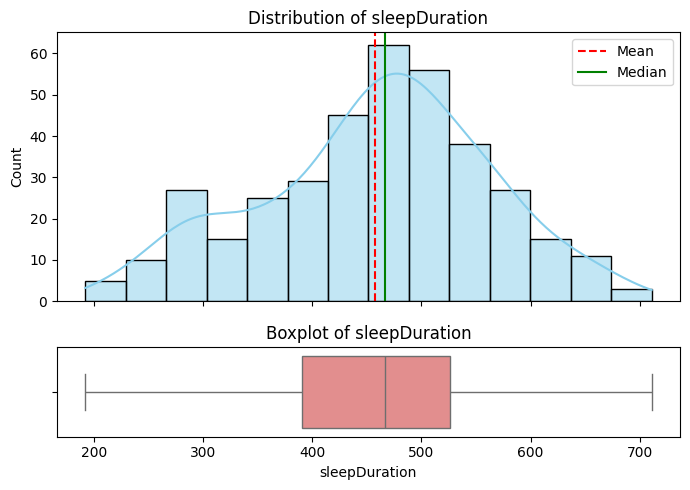

  deepSleepDuration
  Count: 368
  Missing: 0 (0.0%)
  Mean: 5465.54
  Median: 5520.00
  Std: 1256.99
  Outliers: 8


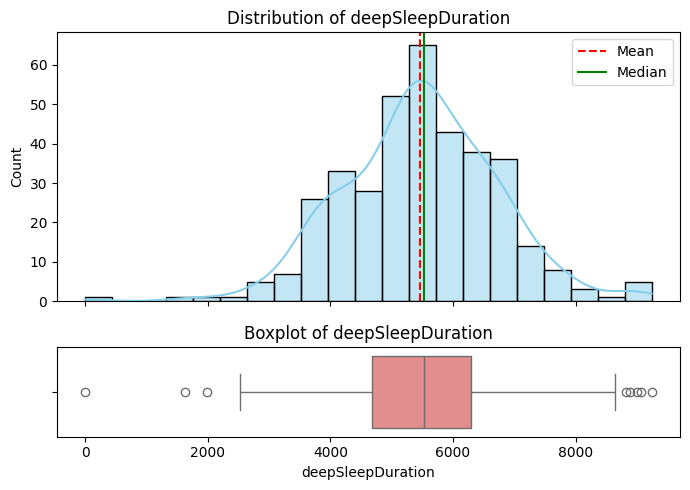

  lightSleepDuration
  Count: 368
  Missing: 0 (0.0%)
  Mean: 17270.87
  Median: 17370.00
  Std: 4612.81
  Outliers: 1


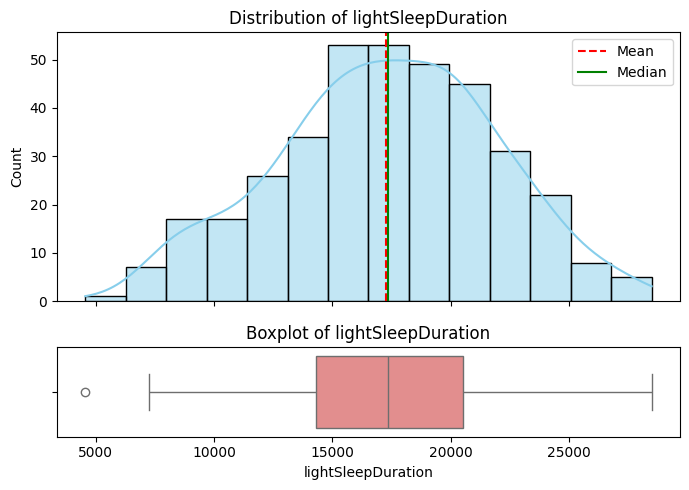

  remSleepDuration
  Count: 368
  Missing: 0 (0.0%)
  Mean: 4724.84
  Median: 4380.00
  Std: 2810.67
  Outliers: 1


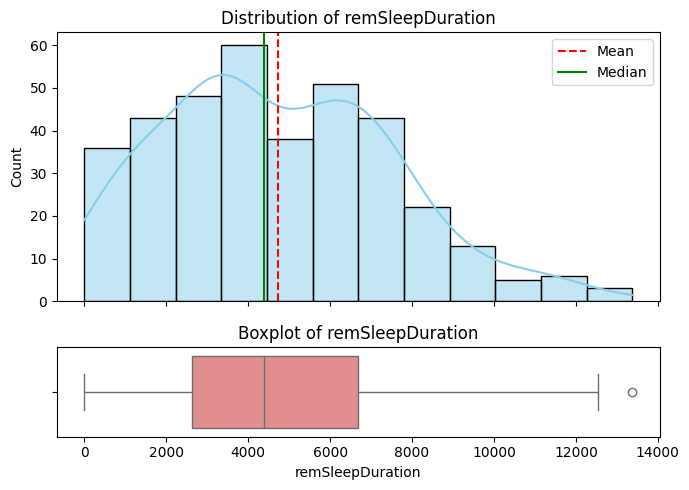

  spo2Avg
  Count: 277
  Missing: 91 (24.7%)
  Mean: 94.85
  Median: 95.00
  Std: 1.10
  Outliers: 21


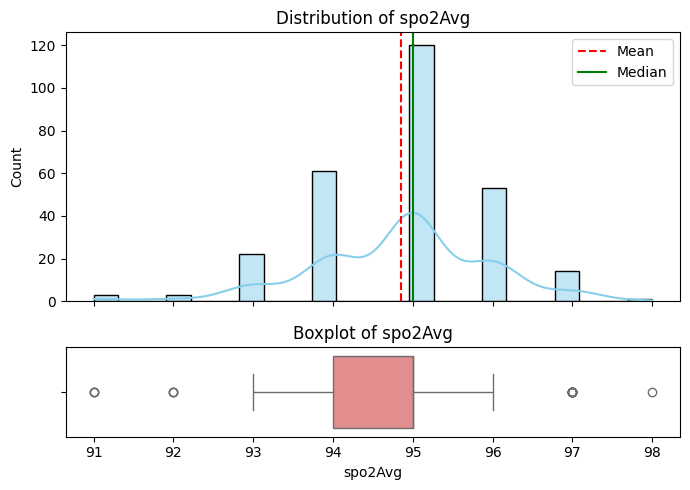

  spo2Low
  Count: 277
  Missing: 91 (24.7%)
  Mean: 88.52
  Median: 89.00
  Std: 2.37
  Outliers: 4


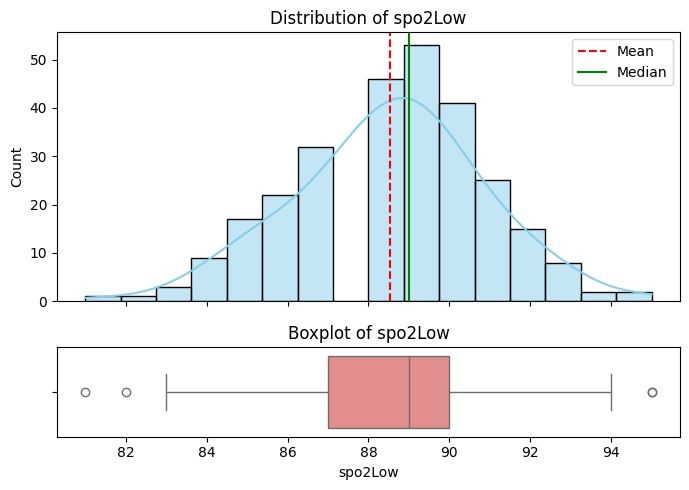

  spo2High
  Count: 277
  Missing: 91 (24.7%)
  Mean: 99.25
  Median: 100.00
  Std: 0.92
  Outliers: 10


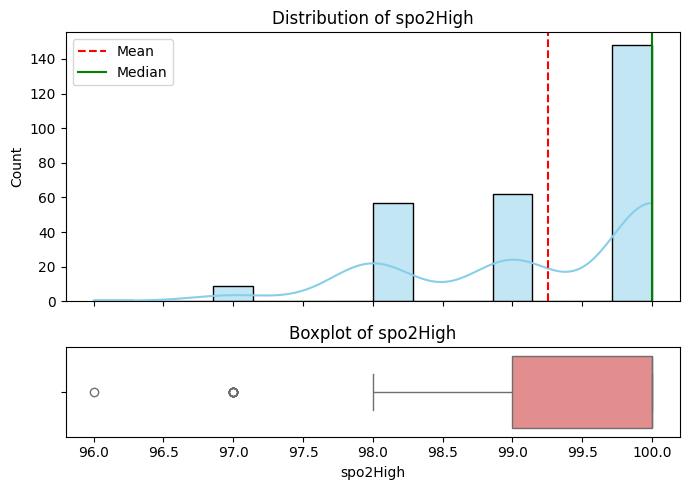

  respirationAvg
  Count: 368
  Missing: 0 (0.0%)
  Mean: 14.32
  Median: 14.00
  Std: 0.66
  Outliers: 1


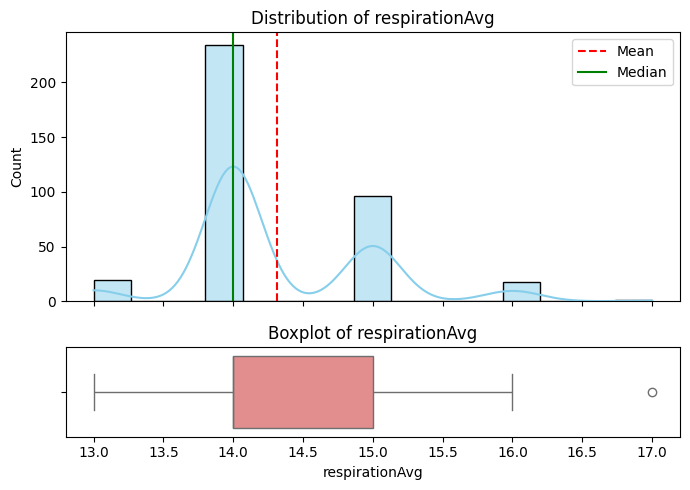

  respirationLow
  Count: 368
  Missing: 0 (0.0%)
  Mean: 11.47
  Median: 12.00
  Std: 0.98
  Outliers: 20


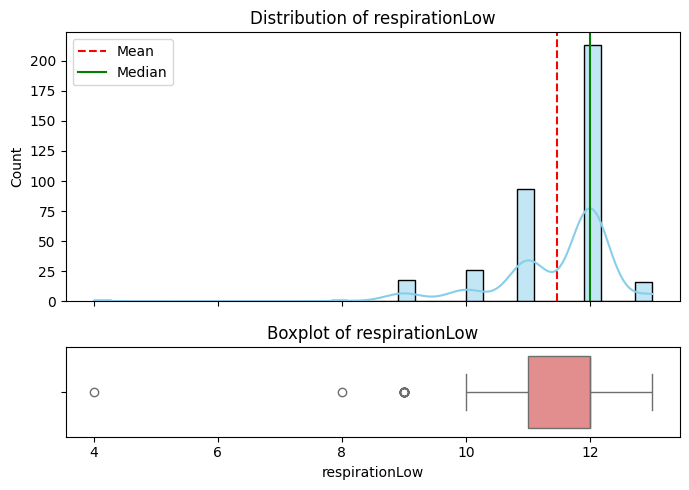

  respirationHigh
  Count: 368
  Missing: 0 (0.0%)
  Mean: 18.80
  Median: 19.00
  Std: 2.06
  Outliers: 1


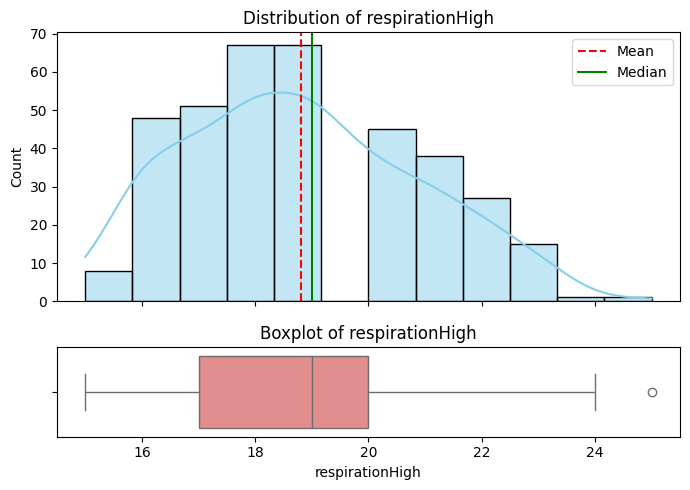

  awakeCounter
  Count: 368
  Missing: 0 (0.0%)
  Mean: 0.55
  Median: 0.00
  Std: 0.78
  Outliers: 9


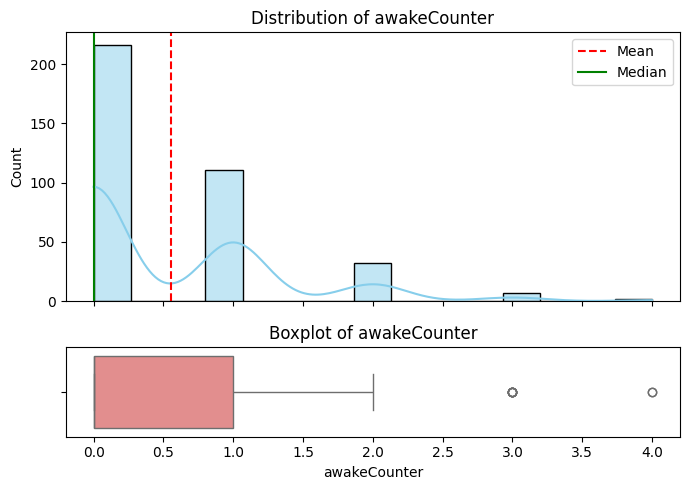

  avgOvernightHrv
  Count: 144
  Missing: 224 (60.9%)
  Mean: 81.35
  Median: 82.00
  Std: 14.69
  Outliers: 1


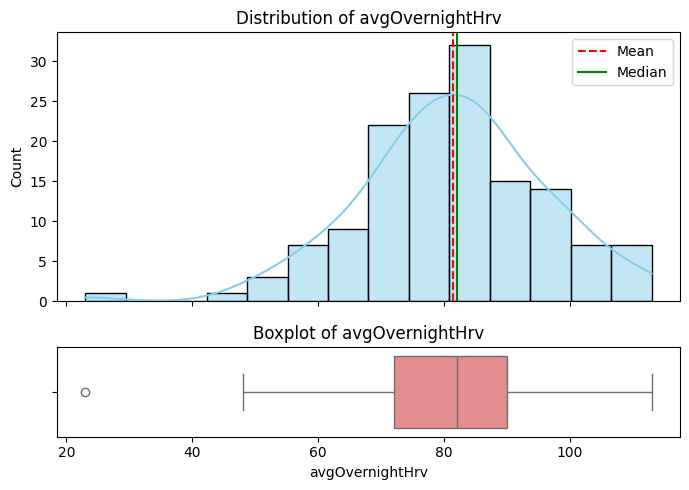

  restingHeartRate
  Count: 368
  Missing: 0 (0.0%)
  Mean: 48.05
  Median: 48.00
  Std: 2.93
  Outliers: 3


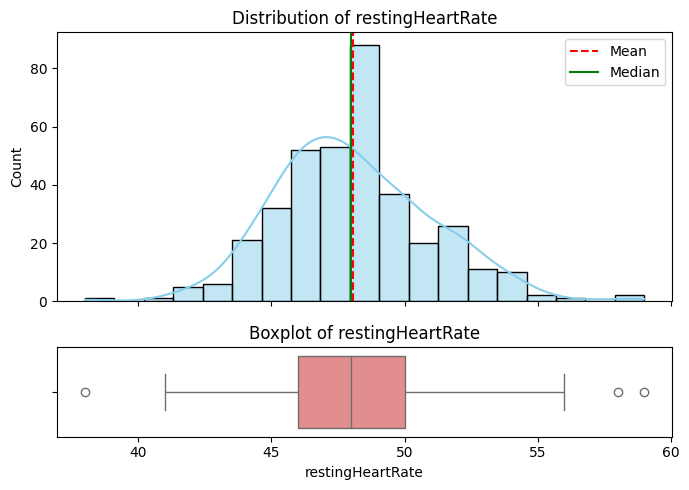

  restlessmoment
  Count: 144
  Missing: 224 (60.9%)
  Mean: 36.08
  Median: 37.00
  Std: 13.58
  Outliers: 1


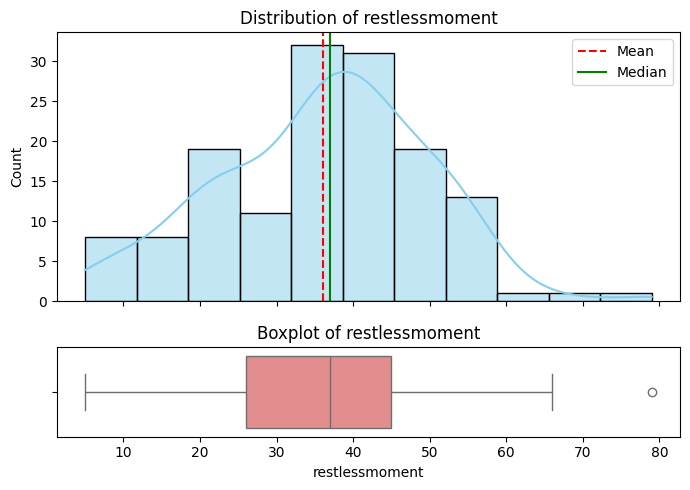

  sleep_efficiency
  Count: 368
  Missing: 0 (0.0%)
  Mean: 0.98
  Median: 0.99
  Std: 0.03
  Outliers: 19


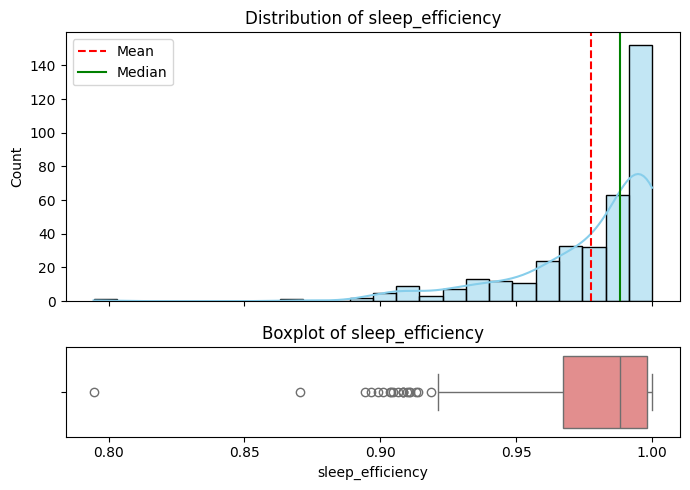

  7d_rolling_hrv
  Count: 143
  Missing: 225 (61.1%)
  Mean: 81.14
  Median: 82.71
  Std: 9.41
  Outliers: 0


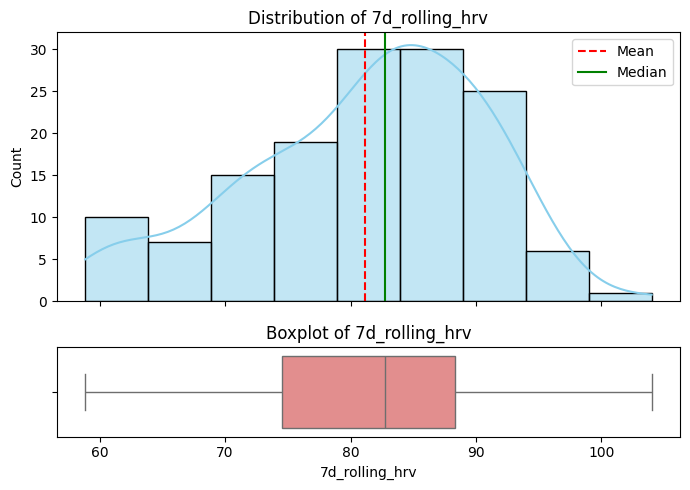

  7d_rolling_rhr
  Count: 367
  Missing: 1 (0.3%)
  Mean: 48.06
  Median: 48.00
  Std: 1.99
  Outliers: 7


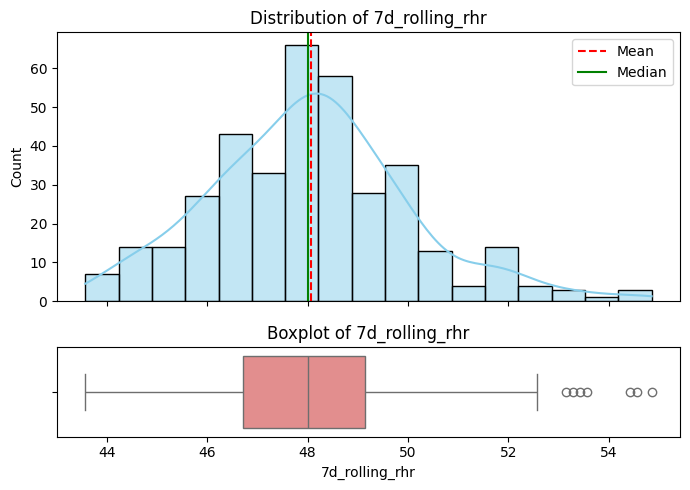

  7d_rolling_sleep_duration
  Count: 367
  Missing: 1 (0.3%)
  Mean: 458.32
  Median: 459.71
  Std: 28.42
  Outliers: 3


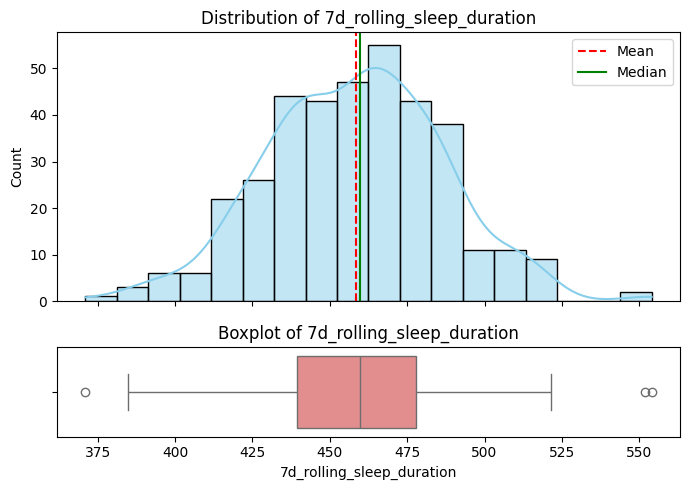

In [57]:
num_cols = df_clean.select_dtypes(include='number').columns
missing_threshold = 0.7

for col in num_cols:
        missing_ratio = df_clean[col].isna().mean()
        if missing_ratio > missing_threshold:
            print(f"Skipping '{col}' due to high missing rate ({missing_ratio:.2%})")
            continue

        data = df_clean[col].dropna()
        q1, q3 = data.quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data < lower_bound) | (data > upper_bound)]

        print(f"  {col}")
        print(f"  Count: {len(data)}")
        print(f"  Missing: {df_clean[col].isna().sum()} ({missing_ratio:.1%})")
        print(f"  Mean: {data.mean():.2f}")
        print(f"  Median: {data.median():.2f}")
        print(f"  Std: {data.std():.2f}")
        print(f"  Outliers: {len(outliers)}")

        fig, axes = plt.subplots(2, 1, figsize=(7, 5), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

        sns.histplot(data, kde=True, ax=axes[0], color='skyblue')
        axes[0].axvline(data.mean(), color='red', linestyle='--', label='Mean')
        axes[0].axvline(data.median(), color='green', linestyle='-', label='Median')
        axes[0].set_title(f'Distribution of {col}')
        axes[0].legend()

        sns.boxplot(x=data, ax=axes[1], color='lightcoral')
        axes[1].set_title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()

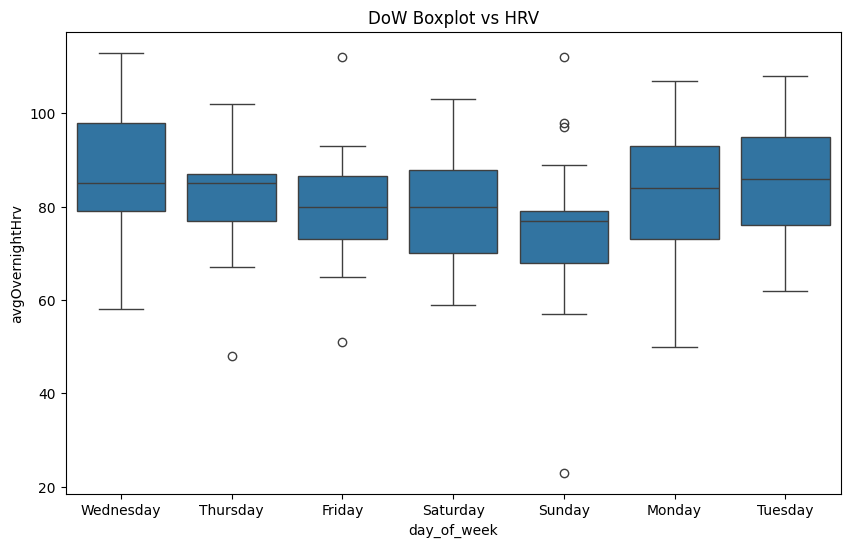

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='avgOvernightHrv', data=df_clean)
plt.title("DoW Boxplot vs HRV")
plt.show()

**Sleep Matrix**

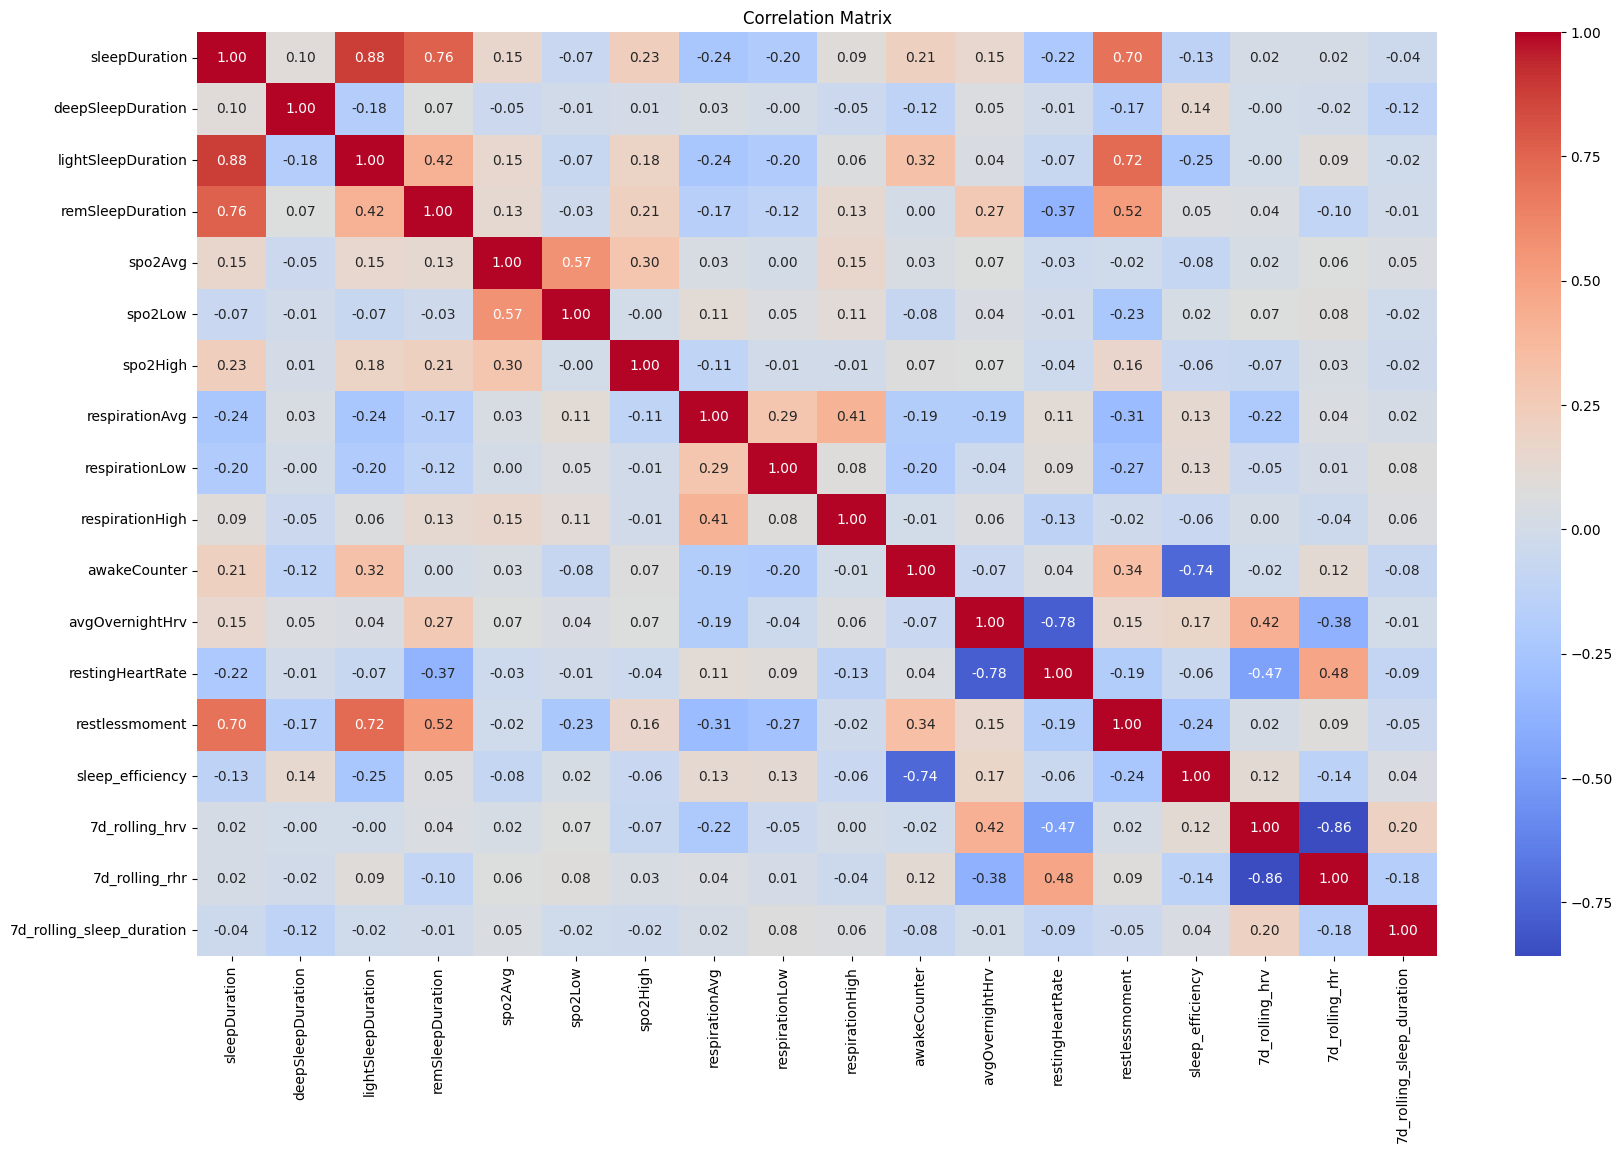

In [59]:
plt.figure(figsize=(20, 12))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [60]:
#Testing adding workouts 
df = pd.read_csv("../data/training_24_25/workouts.csv")
df2 = pd.read_csv("../data/training_25_pre/workouts.csv")
df_workouts = pd.concat([df, df2], ignore_index=True)

df_workouts = df_workouts.drop(columns=[
    'Title',
'WorkoutDescription',
'PlannedDistanceInMeters',
'CoachComments',
'PowerMax',
'Energy',
'AthleteComments',
'CadenceMax',
'TorqueAverage',
'TorqueMax',
'PWRZone1Minutes',
'PWRZone2Minutes',
'PWRZone3Minutes',
'PWRZone4Minutes',
'PWRZone5Minutes',
'PWRZone6Minutes',
'PWRZone7Minutes',
'PWRZone8Minutes',
'PWRZone9Minutes',
'PWRZone10Minutes',
'HRZone1Minutes',
'HRZone2Minutes',
'HRZone3Minutes',
'HRZone4Minutes',
'HRZone5Minutes',
'HRZone6Minutes',
'HRZone7Minutes',
'HRZone8Minutes',
'HRZone9Minutes',
'HRZone10Minutes',
'VelocityMax'
])
display(df_workouts)

df['WorkoutDay'] = pd.to_datetime(df['WorkoutDay'])
df_dayworkouts = (
    df
    .groupby('WorkoutDay')
    .agg({
        'WorkoutType': lambda x: list(x.unique()),
        'PlannedDuration': 'sum',
        'DistanceInMeters': 'sum',
        'TimeTotalInHours': 'sum',
        'TSS': 'sum',
        'IF': 'mean',
        'HeartRateAverage': 'mean',
    })
    .reset_index()
)
df_workouts['WorkoutDay'] = pd.to_datetime(df_workouts['WorkoutDay'])

df_merge = df_clean.merge(
    df_workouts,
    left_on='date',
    right_on='WorkoutDay',
    how='left',   
    suffixes=('', '_wk')  
)

df_merge.info()

df_merge['TSS_yesterday'] = df_merge['TSS'].shift(1)


,WorkoutType,PlannedDuration,WorkoutDay,DistanceInMeters,PowerAverage,TimeTotalInHours,VelocityAverage,CadenceAverage,HeartRateAverage,HeartRateMax,IF,TSS,Rpe,Feeling
0,Run,0.980833,2024-06-19,10139.009766,NaN,1.001108,2.813000,155.0,155.0,243.0,0.666326,49.25,NaN,NaN
1,Run,1.500000,2024-06-20,14548.450195,NaN,1.505178,2.685000,160.0,150.0,247.0,0.622997,65.39,NaN,NaN
2,Bike,1.000000,2024-06-20,1195.119995,169.0,1.000782,0.332000,84.0,129.0,163.0,0.726901,52.92,NaN,NaN
3,Bike,1.000000,2024-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Swim,1.000000,2024-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,Swim,1.250000,2025-06-27,4000.000000,NaN,1.224375,0.905387,53.0,NaN,NaN,0.889343,86.12,NaN,NaN
628,Strength,0.500000,2025-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,Run,1.750000,2025-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
630,Swim,NaN,2025-06-29,243.949997,NaN,0.252509,0.268000,5.0,86.0,120.0,0.262995,0.46,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       647 non-null    datetime64[ns]
 1   startTime                  647 non-null    datetime64[ns]
 2   endTime                    647 non-null    datetime64[ns]
 3   sleepDuration              647 non-null    float64       
 4   deepSleepDuration          647 non-null    float64       
 5   lightSleepDuration         647 non-null    float64       
 6   remSleepDuration           647 non-null    float64       
 7   spo2Avg                    483 non-null    float64       
 8   spo2Low                    483 non-null    float64       
 9   spo2High                   483 non-null    float64       
 10  respirationAvg             647 non-null    float64       
 11  respirationLow             647 non-null    float64       
 12  respirat

In [61]:
# Define time constants for CTL(42 days) and ATL (7 Days)
CTL_TIME_CONSTANT = 42
ATL_TIME_CONSTANT = 7

def ewma_tss(tss_series, time_constant):
    alpha = 1 - np.exp(-1 / time_constant)
    return tss_series.ewm(alpha=alpha, adjust=False).mean()

# long term fitness
df_merge['CTL'] = ewma_tss(df_merge['TSS'], CTL_TIME_CONSTANT)

# short term fatigue
df_merge['ATL'] = ewma_tss(df_merge['TSS'], ATL_TIME_CONSTANT)

# freshness
df_merge['TSB'] = df_merge['CTL'] - df_merge['ATL']

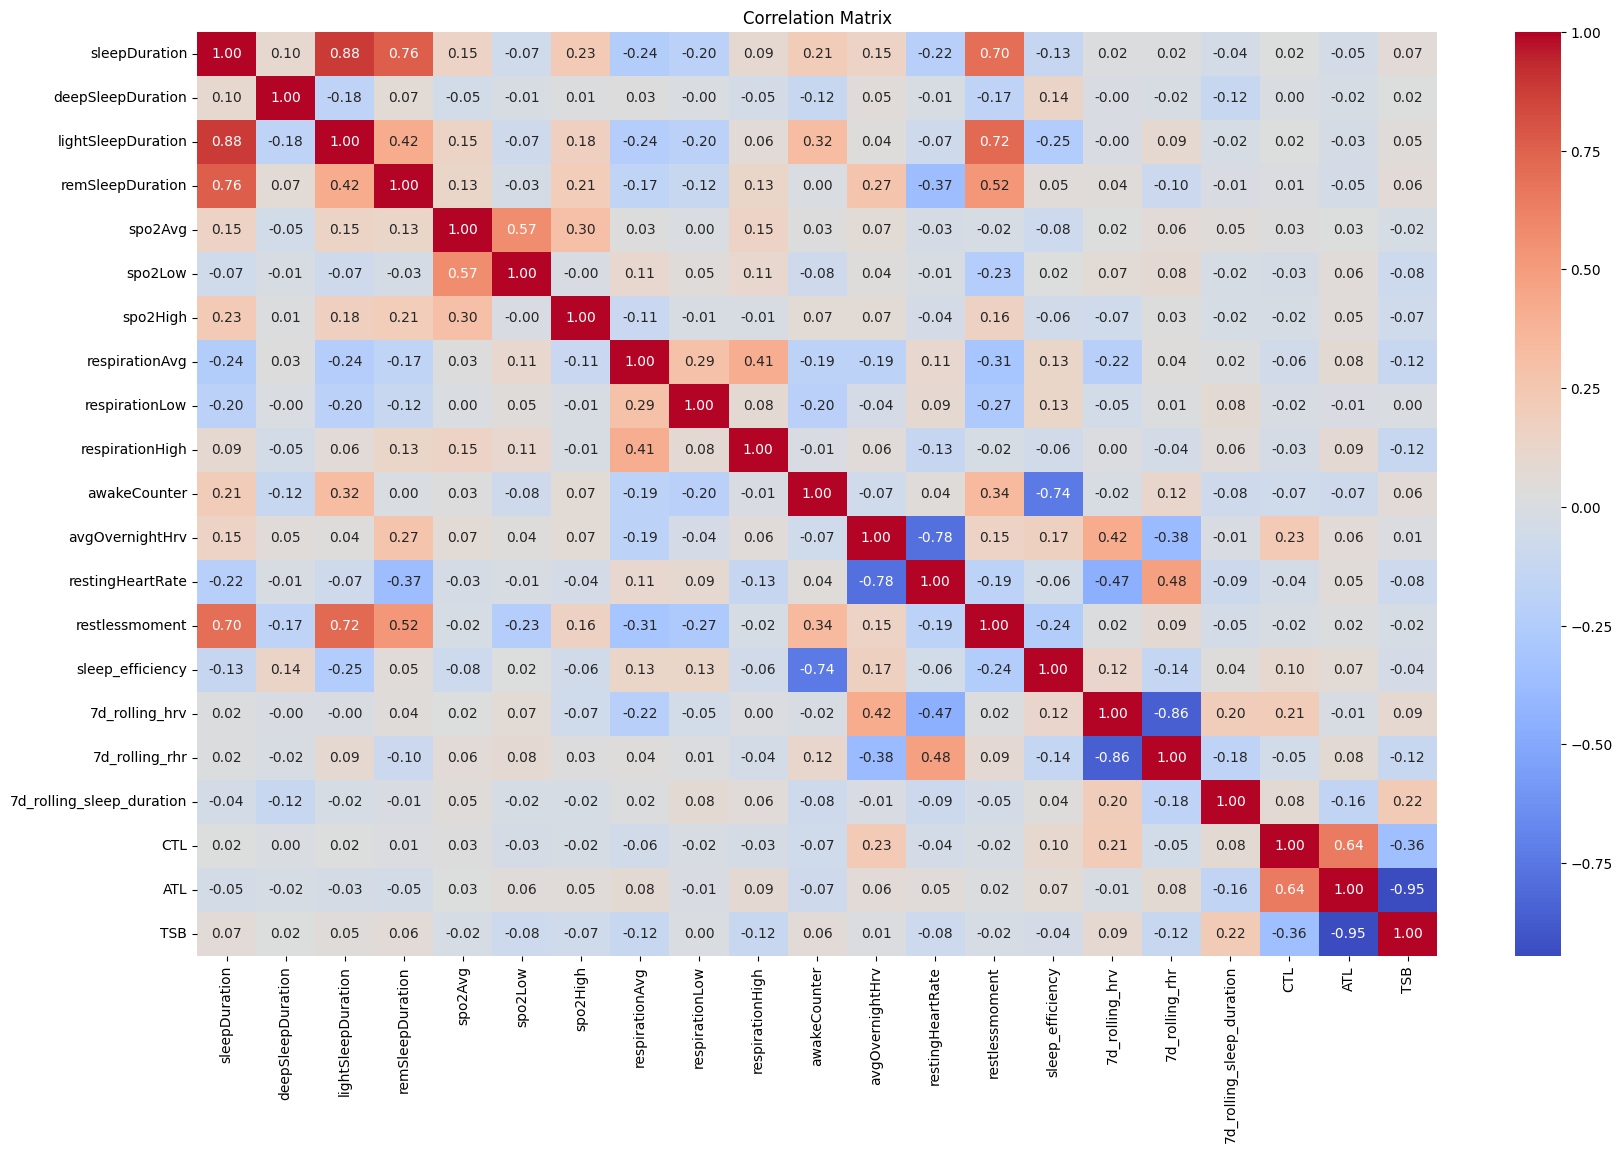

In [63]:
test_df = df_clean.copy()

test_df['CTL'] = df_merge['CTL']
test_df['ATL'] = df_merge['ATL'] 
test_df['TSB'] = df_merge['TSB'] 

plt.figure(figsize=(20, 12))
sns.heatmap(test_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Correlation Matrix**

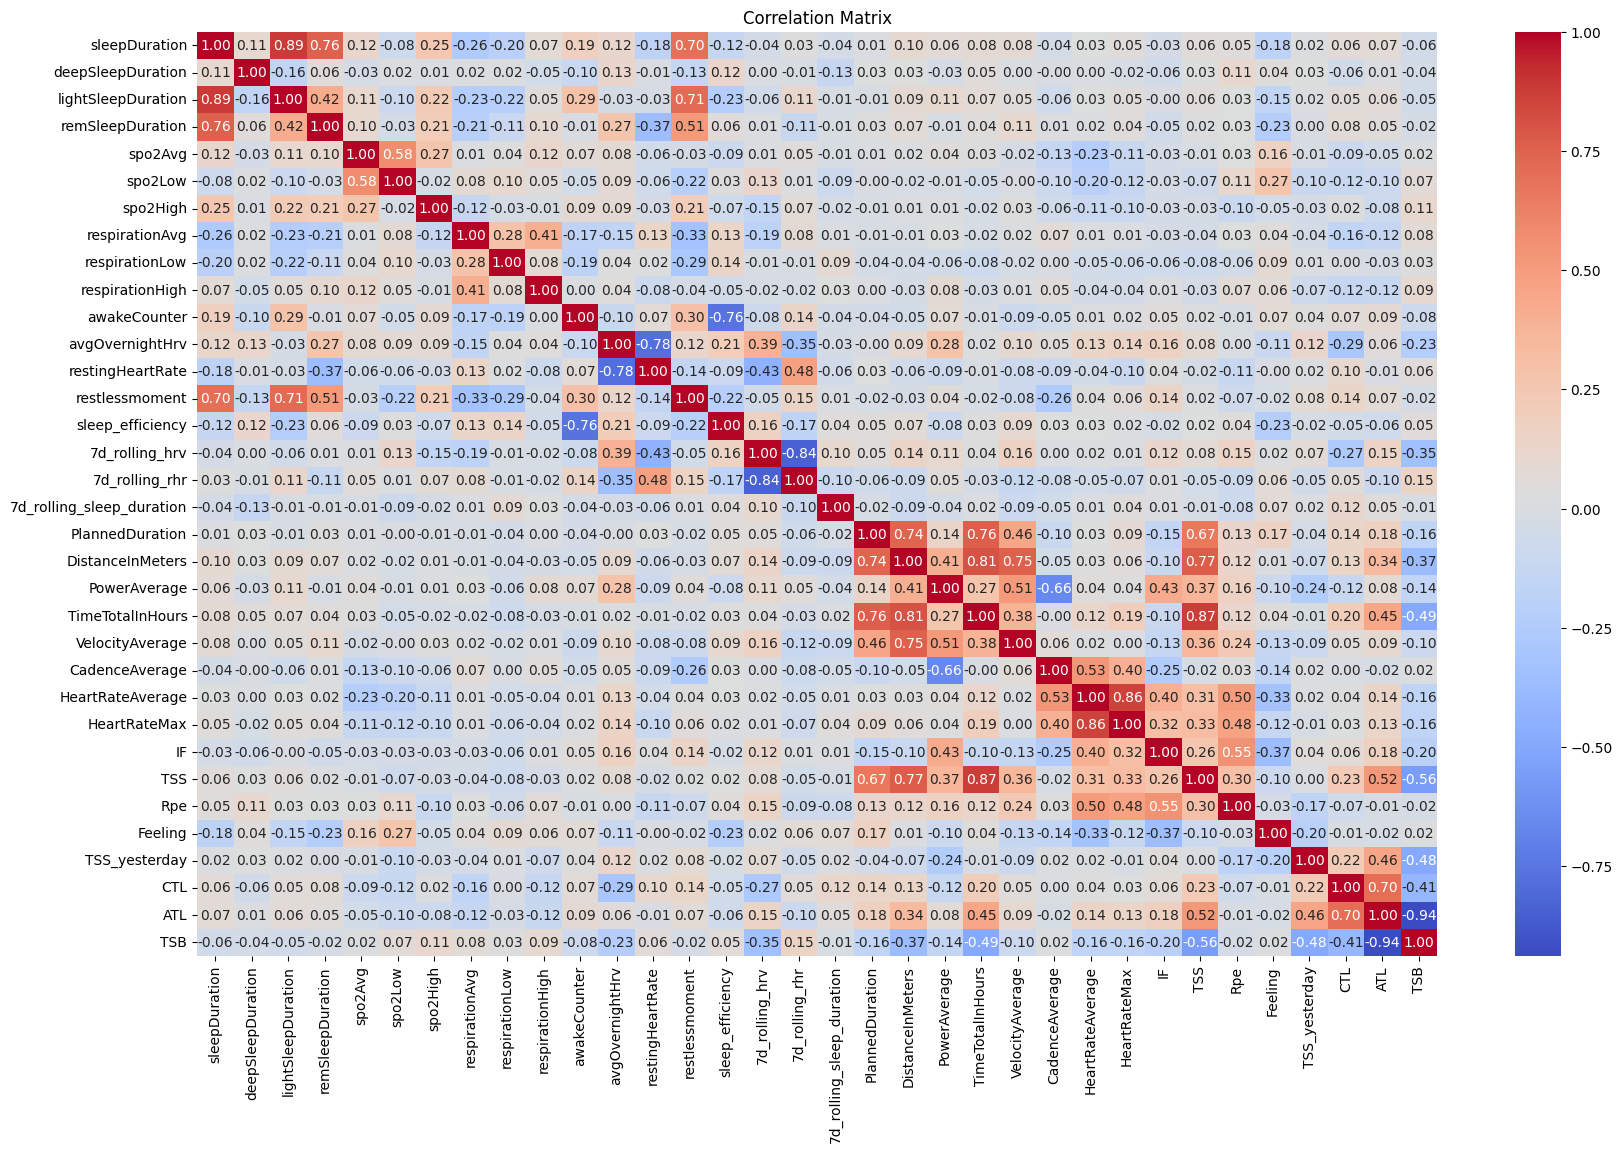

In [62]:
plt.figure(figsize=(20, 12))
sns.heatmap(df_merge.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows many different strong correlations that follow known physiology. 

7 day rolling average collums do not seem to have any correlations to daily results

When considering REM sleep the total amount of sleep had indicates relationship which makes sense due to sleep arcitecture. 
This also makes sense that relationship between rem and light is positive because the more lightsleep means more sleep overall and therefore more rem sleep